In [ ]:
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/Users/Pc/Downloads')

In [4]:
df_product = pd.read_csv("DIM_PRODUCT.csv", encoding="latin1")
df_sales = pd.read_csv("FACT_SALES.csv", encoding="latin1")
df_segment = pd.read_csv("DIM_SEGMENT.csv", encoding="latin1")
df_category = pd.read_csv("DIM_CATEGORY.csv", encoding="latin1")

In [6]:
#UNIR TABLAS
df = df_sales.merge(df_product, left_on="ITEM_CODE", right_on="ITEM", how="left")
df = df.merge(df_segment, on="CATEGORY", how="left")
df = df.merge(df_category, left_on="CATEGORY", right_on="ID_CATEGORY", how="left")

print("Dimensiones del dataframe final:", df.shape)
print(df.head(3))

Dimensiones del dataframe final: (6466106, 22)
    WEEK         ITEM_CODE  TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  \
0  34-22  7501058792808BP2             0.006              0.139   
1  34-22  7501058792808BP2             0.006              0.139   
2  34-22  7501058792808BP2             0.006              0.139   

   TOTAL_UNIT_AVG_WEEKLY_SALES              REGION MANUFACTURER   BRAND  \
0                          1.0  TOTAL AUTOS AREA 5      RECKITT  VANISH   
1                          1.0  TOTAL AUTOS AREA 5      RECKITT  VANISH   
2                          1.0  TOTAL AUTOS AREA 5      RECKITT  VANISH   

               ITEM                                   ITEM_DESCRIPTION  ...  \
0  7501058792808BP2  VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...  ...   
1  7501058792808BP2  VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...  ...   
2  7501058792808BP2  VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...  ...   

       ATTR1_x           ATTR2_x ATTR3_x ATTR1_y ATTR2_y    ATTR3_

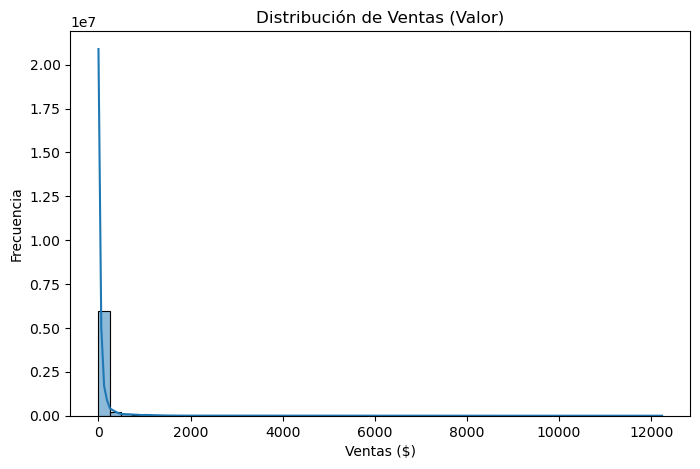

In [7]:
# DISTRIBUCIÓN DE VENTAS (Histogramas y Boxplots)

plt.figure(figsize=(8,5))
sns.histplot(df["TOTAL_VALUE_SALES"], bins=50, kde=True)
plt.title("Distribución de Ventas (Valor)")
plt.xlabel("Ventas ($)")
plt.ylabel("Frecuencia")
plt.show()

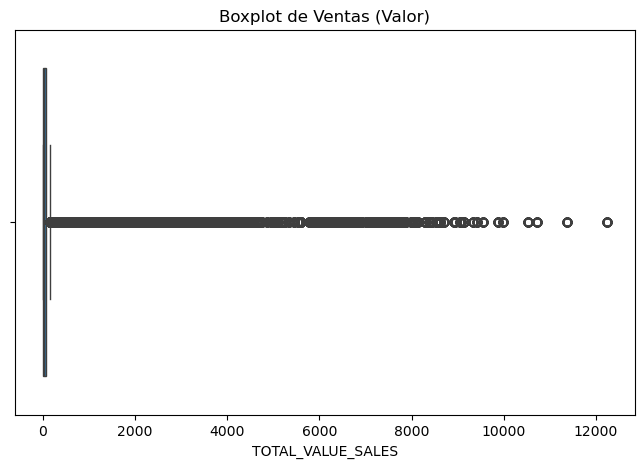

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["TOTAL_VALUE_SALES"])
plt.title("Boxplot de Ventas (Valor)")
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_10300\1748335851.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2022-08-22 00:00:00', '2022-08-22 00:00:00', '2022-08-22 00:00:00',
 '2022-08-22 00:00:00', '2022-08-22 00:00:00', '2022-08-22 00:00:00',
 '2022-08-22 00:00:00', '2022-08-22 00:00:00', '2022-08-22 00:00:00',
 '2022-08-22 00:00:00',
 ...
 '2023-06-26 00:00:00', '2023-06-26 00:00:00', '2023-06-26 00:00:00',
 '2023-06-26 00:00:00', '2023-06-26 00:00:00', '2023-06-26 00:00:00',
 '2023-06-26 00:00:00', '2023-06-26 00:00:00', '2023-06-26 00:00:00',
 '2023-06-26 00:00:00']
Length: 6466106, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask_semana, "DATE"] = pd.to_datetime(


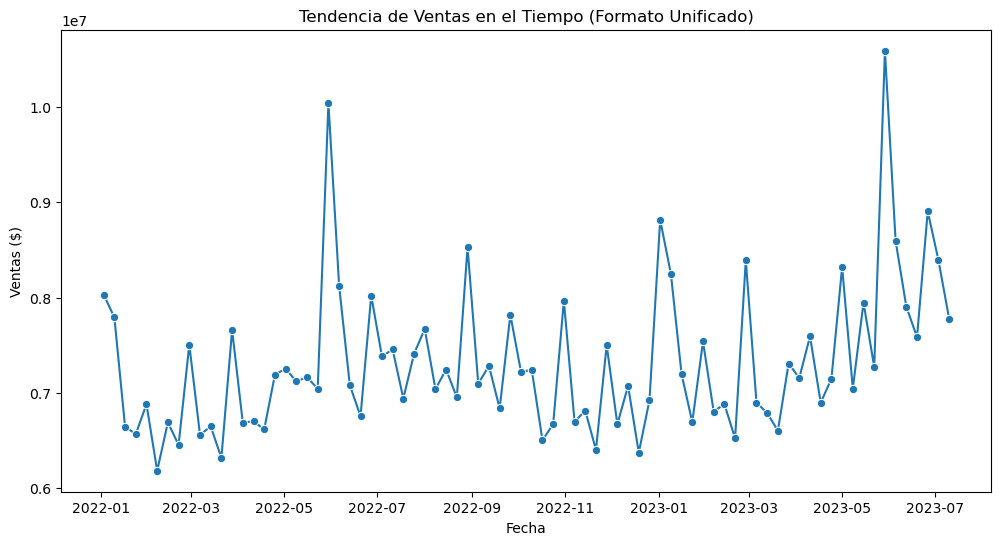

In [13]:
#TENDENCIA DE VENTAS EN EL TIEMPO (UNIFICANDO FORMATO WEEK)
# =========================================
import numpy as np

df["DATE"] = np.nan

# Formato semana-año (ej. "4-22")
mask_semana = df["WEEK"].str.match(r"^\d{1,2}-\d{2}$")
df.loc[mask_semana, "DATE"] = pd.to_datetime(
    df.loc[mask_semana].apply(lambda row: f"20{row['WEEK'].split('-')[1]}-W{int(row['WEEK'].split('-')[0]):02}-1", axis=1),
    format="%G-W%V-%u"
)

# Formato mes-año (ej. "feb-23")
mask_mes = df["WEEK"].str.match(r"^[a-zA-Z]{3}-\d{2}$")
df.loc[mask_mes, "DATE"] = pd.to_datetime(
    df.loc[mask_mes, "WEEK"], format="%b-%y"
)

# Eliminar filas sin fecha válida
df = df.dropna(subset=["DATE"])

# Agrupamos ventas totales por fecha
ventas_fecha = df.groupby("DATE")["TOTAL_VALUE_SALES"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_fecha, x="DATE", y="TOTAL_VALUE_SALES", marker="o")
plt.title("Tendencia de Ventas en el Tiempo (Formato Unificado)")
plt.xlabel("Fecha")
plt.ylabel("Ventas ($)")
plt.show()

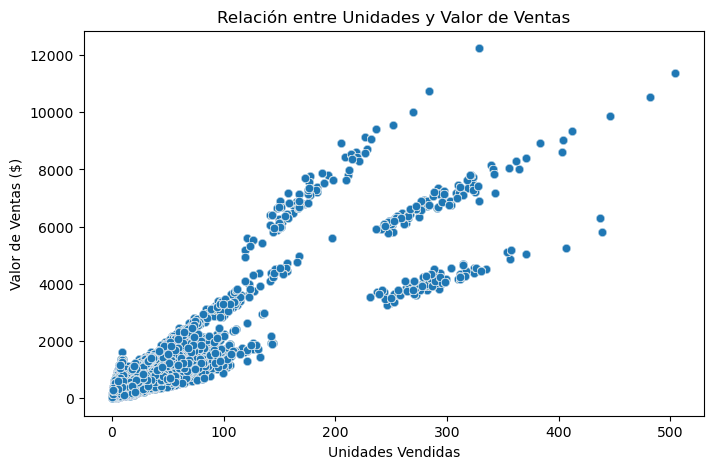

In [14]:
# 5. RELACIÓN ENTRE VARIABLES (Scatter Plot)
# =========================================
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TOTAL_UNIT_SALES", y="TOTAL_VALUE_SALES", alpha=0.3)
plt.title("Relación entre Unidades y Valor de Ventas")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Valor de Ventas ($)")
plt.show()

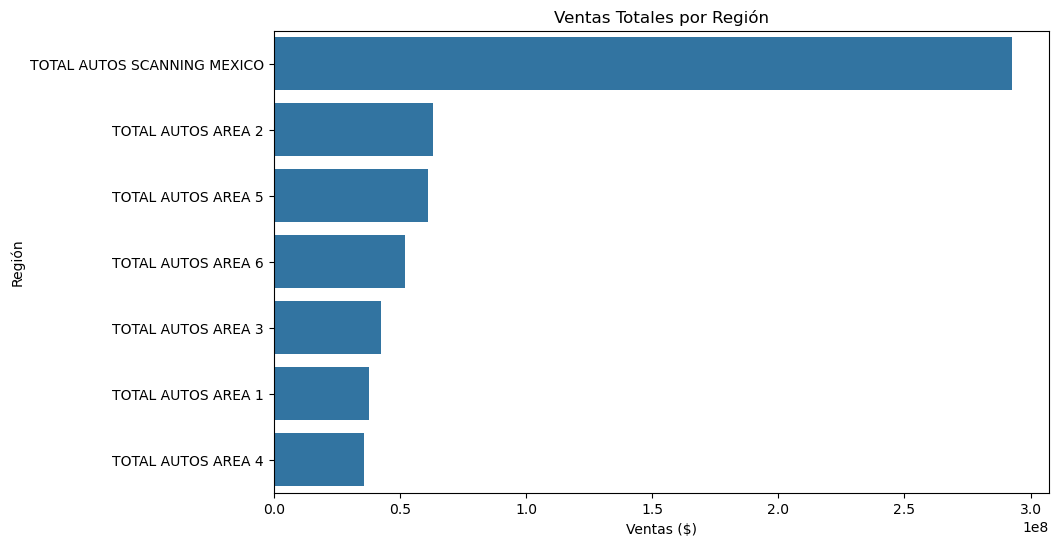

In [15]:
# DISTRIBUCIÓN GEOGRÁFICA (Ventas por Región)
ventas_region = df.groupby("REGION")["TOTAL_VALUE_SALES"].sum().reset_index().sort_values(by="TOTAL_VALUE_SALES", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=ventas_region, x="TOTAL_VALUE_SALES", y="REGION")
plt.title("Ventas Totales por Región")
plt.xlabel("Ventas ($)")
plt.ylabel("Región")
plt.show()

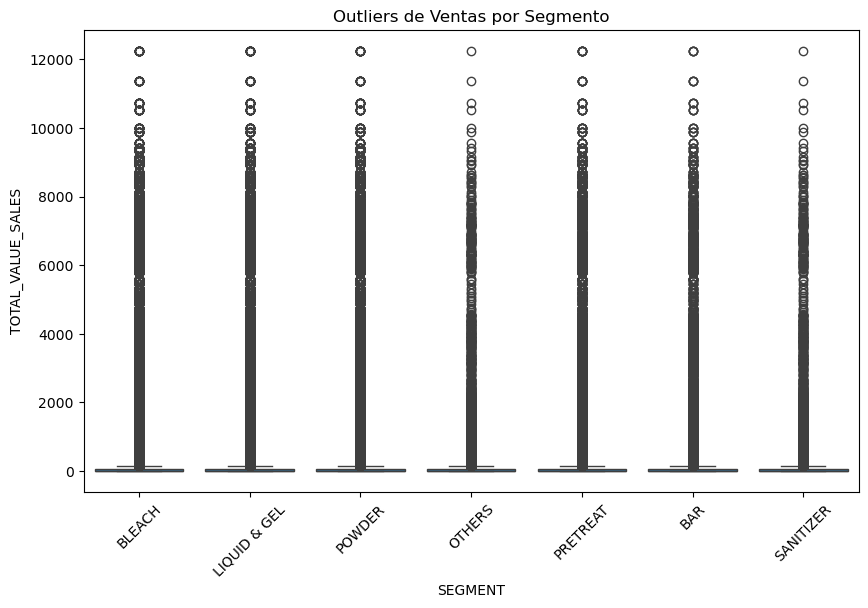

In [ ]:
#DETECCIÓN DE OUTLIERS
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="SEGMENT", y="TOTAL_VALUE_SALES")
plt.xticks(rotation=45)
plt.title("Outliers de Ventas por Segmento")
plt.show()

In [22]:
print(df.columns)

Index(['WEEK', 'ITEM_CODE', 'TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES',
       'TOTAL_UNIT_AVG_WEEKLY_SALES', 'REGION', 'MANUFACTURER', 'BRAND',
       'ITEM', 'ITEM_DESCRIPTION', 'CATEGORY_x', 'FORMAT_x', 'ATTR1_x',
       'ATTR2_x', 'ATTR3_x', 'ATTR1_y', 'ATTR2_y', 'ATTR3_y', 'FORMAT_y',
       'SEGMENT', 'ID_CATEGORY', 'CATEGORY_y', 'YEAR', 'WEEK_NUM', 'DATE'],
      dtype='object')


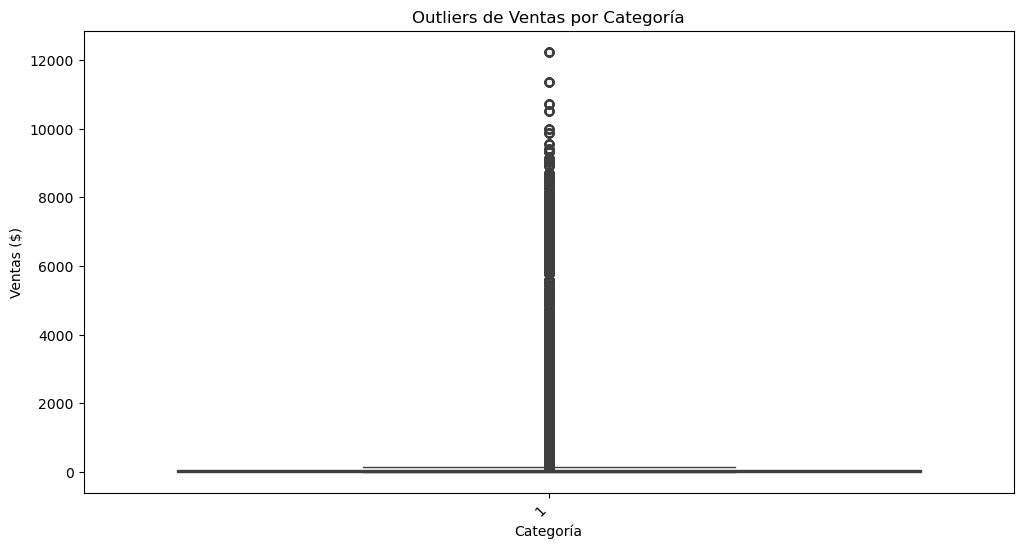

In [23]:
# 7. DETECCIÓN DE OUTLIERS (Por Categoría)
# =========================================
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="CATEGORY_x", y="TOTAL_VALUE_SALES")
plt.xticks(rotation=45, ha="right")
plt.title("Outliers de Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas ($)")
plt.show()

In [26]:
# INSIGHTS PRELIMINARES
print("INSIGHTS ENCONTRADOS:")
print("- La distribución de ventas está sesgada a la derecha: pocos productos concentran grandes ventas.")
print("- Existen fechas con picos claros, posiblemente por campañas o estacionalidad.")
print("- Fuerte correlación visual entre unidades vendidas y valor de ventas.")
print("- Algunas regiones superan ampliamente a otras en ventas, identificando mercados clave. Destaca: TOTAL AUTOS SCANNING MEXICO")
print("- Outliers notables en segmentos, lo que puede indicar productos estrella o errores de registro. Solo se tienen registros de venta de la categoria 1")

INSIGHTS ENCONTRADOS:
- La distribución de ventas está sesgada a la derecha: pocos productos concentran grandes ventas.
- Existen fechas con picos claros, posiblemente por campañas o estacionalidad.
- Fuerte correlación visual entre unidades vendidas y valor de ventas.
- Algunas regiones superan ampliamente a otras en ventas, identificando mercados clave. Destaca: TOTAL AUTOS SCANNING MEXICO
- Outliers notables en segmentos, lo que puede indicar productos estrella o errores de registro. Solo se tienen registros de venta de la categoria 1
